In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img
import warnings
warnings.filterwarnings("ignore")
import os
import cv2
import random

In [2]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip


--2025-01-19 05:45:18--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 184.25.248.114, 2600:1417:3f:5b3::317f, 2600:1417:3f:580::317f
Connecting to download.microsoft.com (download.microsoft.com)|184.25.248.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  69.6MB/s    in 7.7s    

2025-01-19 05:45:26 (102 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [3]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

# Create the dataframe

In [4]:
# Create the dataframe for input and output
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/" + class_name):
        if class_name == "Cat":
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Cat/3420.jpg 0


In [5]:
len(label)
len(input_path)

25002

In [6]:
df = pd.DataFrame({"images": input_path, "label": label})
df.head()

,images,label
0,PetImages/Cat/3420.jpg,0
1,PetImages/Cat/1783.jpg,0
2,PetImages/Cat/10368.jpg,0
3,PetImages/Cat/8805.jpg,0
4,PetImages/Cat/8841.jpg,0


In [7]:
# Shuffle the dataset for for mixed columns
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,PetImages/Cat/1788.jpg,0
1,PetImages/Dog/1015.jpg,1
2,PetImages/Dog/8844.jpg,1
3,PetImages/Cat/5327.jpg,0
4,PetImages/Cat/7886.jpg,0


In [8]:
import PIL
l = []
for image in df['images']:
  try:
    img = PIL.Image.open(image)
  except:
    l.append(image)
l

['PetImages/Dog/Thumbs.db',
 'PetImages/Cat/666.jpg',
 'PetImages/Dog/11702.jpg',
 'PetImages/Cat/Thumbs.db']

In [9]:
# Delete some db files
for i in df['images']:
  if '.jpg' not in i :
    print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [10]:
df = df[df['images'] != 'PetImages/Dog/Thumbs.db']
df = df[df['images'] != 'PetImages/Cat/Thumbs.db']
df = df[df['images'] !='PetImages/Cat/666.jpg']
df = df[df['images'] !='PetImages/Dog/11702.jpg']
len(df)


24998

# DataAnalysis

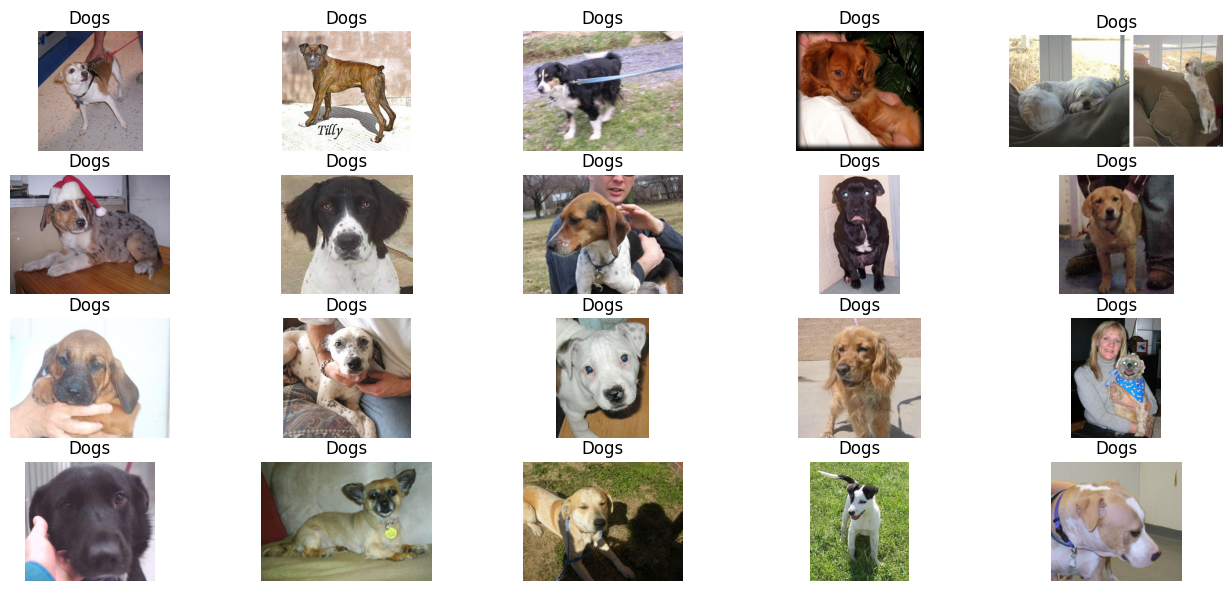

In [11]:
# To display the images
plt.figure(figsize=(16,9))
t_file = df[df['label'] == 1]['images']
start = random.randint(0, len(t_file))
files  = t_file[start:start+20]

for index, file in enumerate(files):
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis("off")

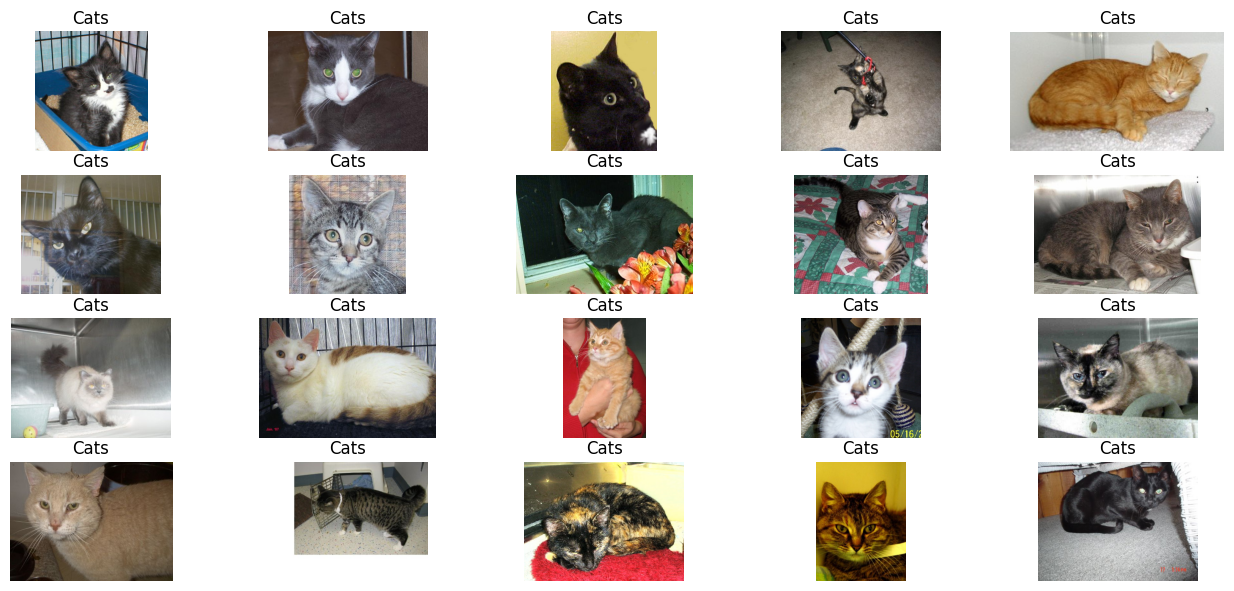

In [12]:
plt.figure(figsize=(16, 9))
t_file = df[df['label'] == 0]['images']
start = random.randint(0, len(t_file))
files = t_file[start:start+20]

for index, file in enumerate(files):
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis("off")

<Axes: ylabel='count'>

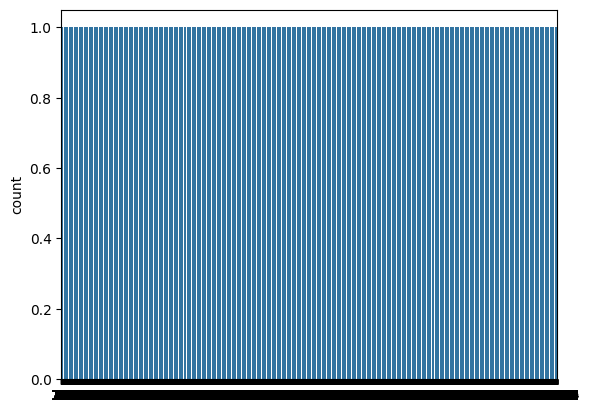

In [13]:
import seaborn as sns
sns.countplot(df['label'])

## Create DataGenerator for the Images

In [14]:
df['label'] = df['label'].astype('str')
df.head()

,images,label
0,PetImages/Cat/1788.jpg,0
1,PetImages/Dog/1015.jpg,1
2,PetImages/Dog/8844.jpg,1
3,PetImages/Cat/5327.jpg,0
4,PetImages/Cat/7886.jpg,0


In [15]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


## Model Creation

In [21]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')])


In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,447,137 (24.59 MB)

 Trainable params: 6,447,137 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(train_iterator, epochs=30, validation_data=val_iterator)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.8418 - loss: 0.3533 - val_accuracy: 0.8380 - val_loss: 0.3525
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - accuracy: 0.8369 - loss: 0.3602 - val_accuracy: 0.8612 - val_loss: 0.3271
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.8492 - loss: 0.3391 - val_accuracy: 0.8376 - val_loss: 0.3703
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - accuracy: 0.8503 - loss: 0.3396 - val_accuracy: 0.8520 - val_loss: 0.3431
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - accuracy: 0.8511 - loss: 0.3426 - val_accuracy: 0.8464 - val_loss: 0.3527
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.8515 - loss: 0.3351 - val_accuracy: 0.8610 - val_loss: 0.3170
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.8513 - loss: 0.3308 - val_accuracy: 0.8524 - val_loss: 0.3385
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.8550 - loss: 0.3264 - val_accuracy: 0.8504 - v

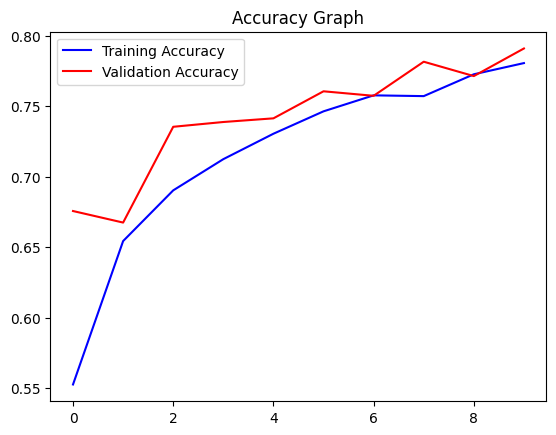

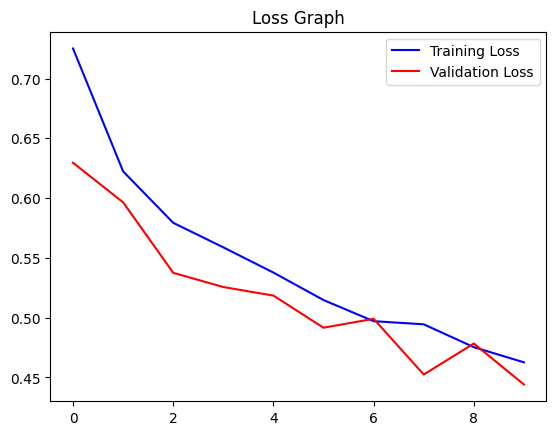

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

Enter the image path (e.g., /content/PetImages/Cat/10.jpg,/content/PetImages/Dog/10120.jpg): /content/PetImages/Dog/10120.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The image is predicted to be: Dog


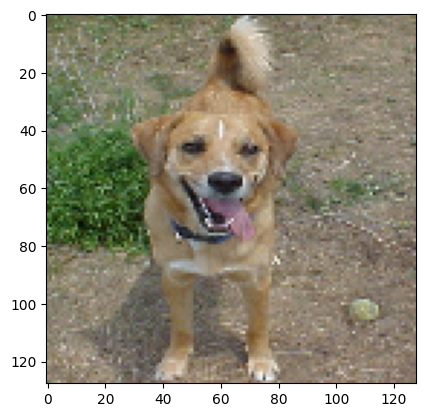

In [42]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

image_path = input("Enter the image path (e.g., /content/PetImages/Cat/10.jpg,/content/PetImages/Dog/10120.jpg): ")

img = load_img(image_path, target_size=(128, 128))
img = img_to_array(img)
img = img / 255.0
img = img.reshape(1, 128, 128, 3)


pred = model.predict(img)


if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'

print(f"The image is predicted to be: {label}")
plt.imshow(img[0])
plt.show()